<a href="https://colab.research.google.com/github/danielduartt/Pandas-Python/blob/main/Tratamento_de_dados_tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as srn

In [11]:
df = pd.read_csv("/content/tempo.csv", sep = ";")
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [19]:
#Variáveis Categóricas
df.groupby(['Aparencia']).size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [20]:
df.loc[df['Aparencia'] == 'menos', "Aparencia"] = "sol"
agrupados = df.groupby(['Aparencia']).size()

<Axes: xlabel='Aparencia'>

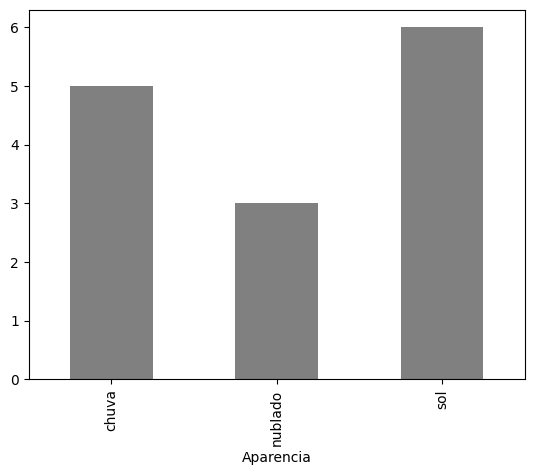

In [21]:
agrupados.plot.bar(color = 'gray')

In [28]:
group_vento = df.groupby(['Vento']).size() # nada a se mudar
group_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

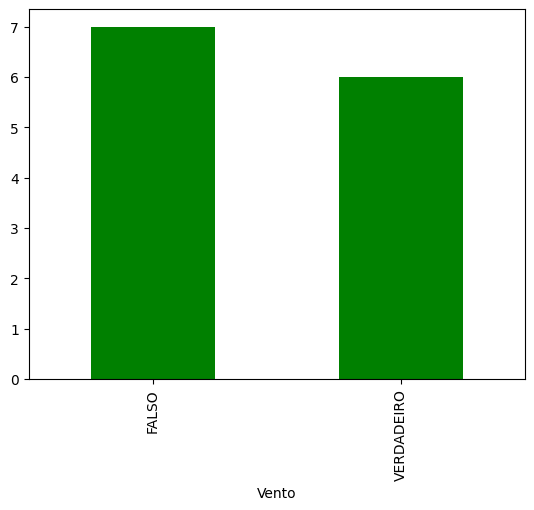

In [29]:
group_vento.plot.bar(color = 'green')

In [30]:
group_game = df.groupby(['Jogar']).size()# nada a se mudar tbm
group_game

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

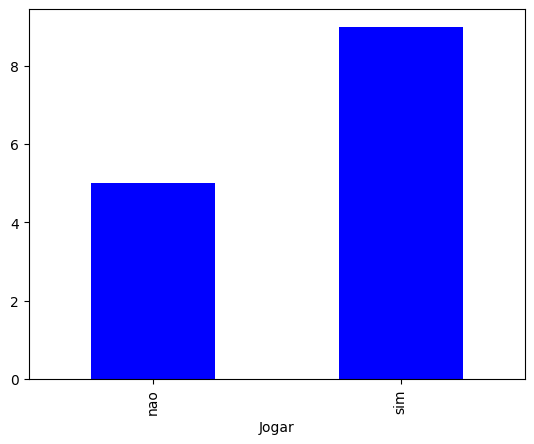

In [31]:
group_game.plot.bar(color = 'blue')

In [32]:
# explorando variáveis numéricas

In [33]:
df['Temperatura'].describe() #dominio da temperatura => [-130, 130]

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

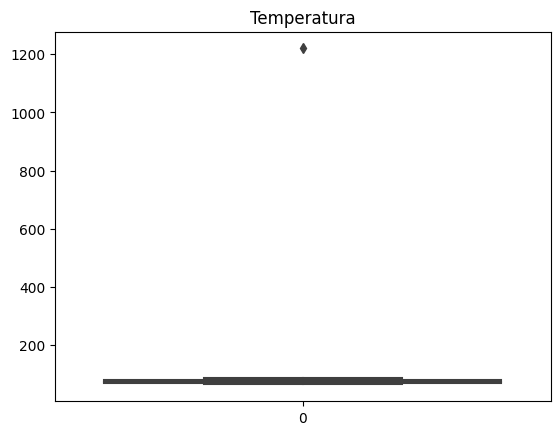

In [34]:
srn.boxplot(df['Temperatura']).set_title("Temperatura")

Text(0.5, 1.0, 'Temperatura')

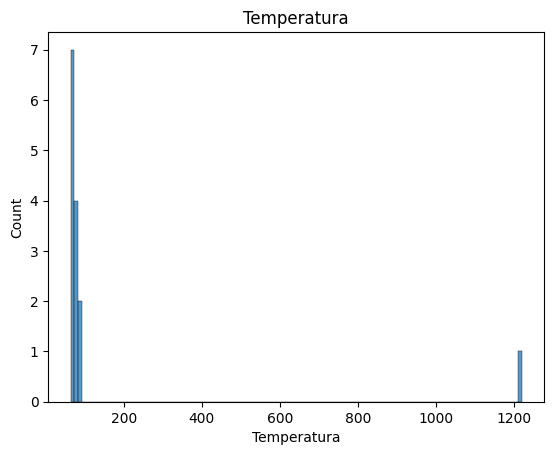

In [40]:
srn.histplot(df['Temperatura']).set_title("Temperatura")

In [50]:
mean_temp = df['Temperatura'].mean()
df.loc[df['Temperatura'] > 130, "Temperatura"]  = mean_temp

Text(0.5, 1.0, 'Temperatura')

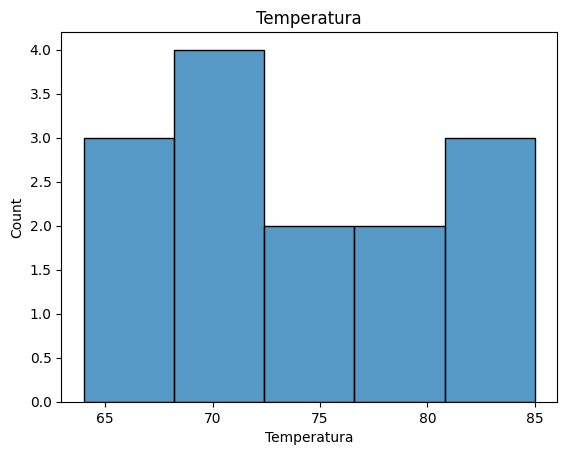

In [51]:
srn.histplot(df['Temperatura']).set_title("Temperatura")

In [54]:
df['Umidade'].describe() #domínio da umidade => [0, 100]

count     13.000000
mean      94.428571
std       39.090337
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [ ]:
display(df)

In [58]:
mean_umidade = df['Umidade'].mean()
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100), "Umidade"] = mean_umidade

In [59]:
df['Umidade'].isnull().sum()

1

In [60]:
df['Umidade'].fillna(mean_umidade, inplace = True)
df['Umidade'].isnull().sum()

0

In [61]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [63]:
df.groupby(['Vento']).size()

Vento
155.57142857142858    1
FALSO                 6
VERDADEIRO            6
dtype: int64

In [64]:
df.loc[df['Vento'] == 155.57142857142858, "Vento"] = "VERDADEIRO"

In [65]:
df.groupby(['Vento']).size()

Vento
FALSO         6
VERDADEIRO    7
dtype: int64

In [66]:
df['Vento'].fillna("FALSO", inplace = True)

In [68]:
df['Vento'].isnull().sum()

0

In [69]:
df.groupby(['Jogar']).size()

Jogar
155.57142857142858    1
nao                   4
sim                   9
dtype: int64

In [70]:
df.loc[df['Jogar'] == 155.57142857142858, "Jogar"] = 'sim'

In [71]:
df.groupby(['Jogar']).size()

Jogar
nao     4
sim    10
dtype: int64

In [72]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64